<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/ML_RandomForest_DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code was made by me Bruno Cury 


Detection of Diabates
---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from PIL import Image


In [ ]:
image = Image.open('/content/images.jpg')

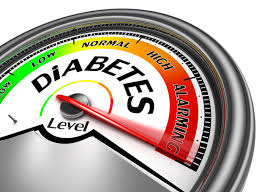

In [ ]:
image

In [ ]:
data = pd.read_csv('/content/diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#VISUALIZAO DE DADOS
np.unique(data['Outcome'], return_counts = True) # 500 tem diabtes(0) e 268 não tem(1)

(array([0, 1]), array([500, 268]))

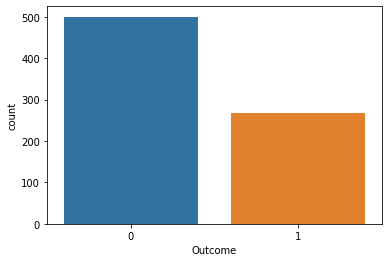

In [ ]:
sns.countplot( x = data['Outcome']);

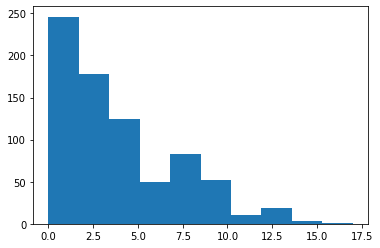

In [ ]:
plt.hist(x = data['Pregnancies']);

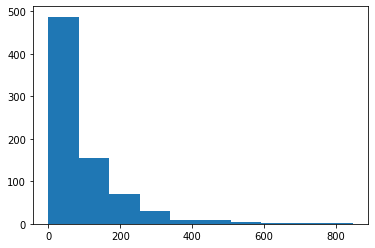

In [ ]:
plt.hist( x = data['Insulin']);

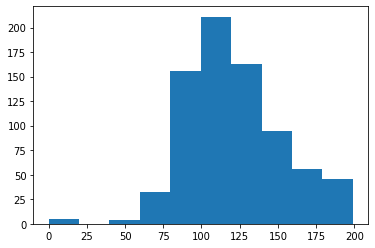

In [ ]:
plt.hist(x = data['Glucose']);

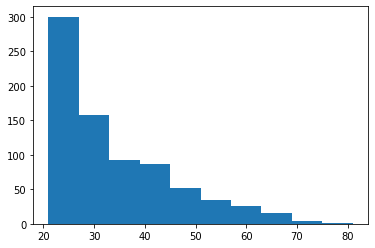

In [ ]:
plt.hist(x = data['Age']);

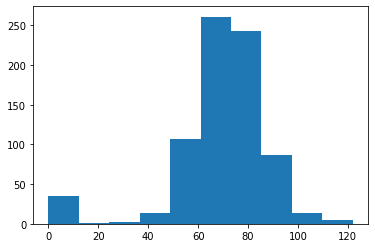

In [ ]:
plt.hist( x = data['BloodPressure']);

In [ ]:
import plotly.express as px

In [ ]:
graph = px.scatter_matrix( data, dimensions=['Pregnancies','Glucose','BloodPressure','Insulin'], color='Outcome')

In [ ]:
graph.show()

In [ ]:
data.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [ ]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#split variables, x indep and y depen.
x = data.iloc[:, 0:8].values
y = data.iloc[:,8].values 

In [ ]:
x,y

(array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
        [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
        [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
        [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
        [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [ ]:
x[:,0].min(), x[:,1].min(), x[:,2].min() 

(0.0, 0.0, 0.0)

In [ ]:
x[:,0].max(), x[:,1].max(), x[:,2].max()

(17.0, 199.0, 122.0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x, y

(array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
          0.46849198,  1.4259954 ],
        [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
         -0.36506078, -0.19067191],
        [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
          0.60439732, -0.10558415],
        ...,
        [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
         -0.68519336, -0.27575966],
        [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
         -0.37110101,  1.17073215],
        [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
         -0.47378505, -0.87137393]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
   

In [ ]:
x[:,0].min(), x[:,1].min(), x[:,2].min()

(-1.1418515161634994, -3.78365371377963, -3.572597239872642)

In [ ]:
x[:,0].max(), x[:,1].max(), x[:,2].max()

(3.906578350084603, 2.4444782063079162, 2.734528247420465)

In [ ]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
x.shape, y.shape

((768, 8), (768,))

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_teste = LabelEncoder()

In [ ]:
teste = label_encoder_teste.fit_transform(x[:,0])

In [ ]:
label_encoder_Pregnancies = LabelEncoder()
label_encoder_Glucose = LabelEncoder()
label_encoder_BloodPressure = LabelEncoder()
label_encoder_SkinThickness = LabelEncoder()
label_encoder_Insulin = LabelEncoder()
label_encoder_BMI = LabelEncoder()
label_encoder_DiabetesPedigreeFunction = LabelEncoder()
label_encoder_Age = LabelEncoder()

In [ ]:
x[:,0] = label_encoder_Pregnancies.fit_transform(x[:,0])
x[:,1] = label_encoder_Glucose.fit_transform(x[:,1])
x[:,2] = label_encoder_BloodPressure.fit_transform(x[:,2])
x[:,3] = label_encoder_SkinThickness.fit_transform(x[:,3])
x[:,4] = label_encoder_Insulin.fit_transform(x[:,4])
x[:,5] = label_encoder_BMI.fit_transform(x[:,5])
x[:,6] = label_encoder_DiabetesPedigreeFunction.fit_transform(x[:,6])
x[:,7] = label_encoder_Age.fit_transform(x[:,7])

In [ ]:
x[0]

array([  6.,  86.,  22.,  28.,   0., 123., 350.,  29.])

In [ ]:
x

array([[  6.,  86.,  22., ..., 123., 350.,  29.],
       [  1.,  23.,  19., ...,  62., 196.,  10.],
       [  8., 121.,  17., ...,  30., 368.,  11.],
       ...,
       [  5.,  59.,  22., ...,  58., 115.,   9.],
       [  1.,  64.,  14., ...,  95., 195.,  26.],
       [  1.,  31.,  21., ...,  98., 169.,   2.]])

In [ ]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [ ]:
x.shape

(768, 8)

In [ ]:
y.shape

(768,)

In [ ]:
len(np.unique(data['Pregnancies']))

17

In [ ]:
len(np.unique(data['Glucose']))

136

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencoder = ColumnTransformer(transformers = [('onehot',OneHotEncoder(), [0,1,2,3,4,5,6,7])], remainder='passthrough')

In [ ]:
x

array([[  6.,  86.,  22., ..., 123., 350.,  29.],
       [  1.,  23.,  19., ...,  62., 196.,  10.],
       [  8., 121.,  17., ...,  30., 368.,  11.],
       ...,
       [  5.,  59.,  22., ...,  58., 115.,   9.],
       [  1.,  64.,  14., ...,  95., 195.,  26.],
       [  1.,  31.,  21., ...,  98., 169.,   2.]])

In [ ]:
x[0]

array([  6.,  86.,  22.,  28.,   0., 123., 350.,  29.])

In [ ]:
x.shape

(768, 8)

In [ ]:
y.shape

(768,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x[0]

array([ 0.64126653,  0.87493656,  0.08472587,  0.951289  , -0.80558232,
        0.18277812,  0.83591289,  1.43289173])

In [ ]:
#Treino e teste

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [ ]:
x_train.shape

(576, 8)

In [ ]:
y_train.shape

(576,)

In [ ]:
x_test.shape

(192, 8)

In [ ]:
y_test.shape

(192,)

In [ ]:
Forest = RandomForestClassifier(n_estimators=50, criterion='entropy')

In [ ]:
Forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [ ]:
previsao = Forest.predict(x_test)

In [ ]:
previsao  #modelo treinado

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
y_test #o que temos para comparar

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
accuracy = accuracy_score(y_test, previsao)

In [ ]:
accuracy

0.78125

0.78125

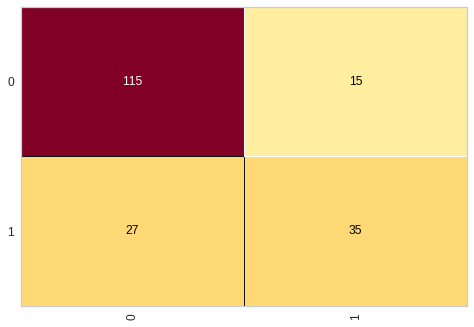

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(Forest)
cm.fit(x_train, y_train)
cm.score(x_test,y_test)

In [ ]:
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       130
           1       0.70      0.56      0.62        62

    accuracy                           0.78       192
   macro avg       0.75      0.72      0.74       192
weighted avg       0.77      0.78      0.77       192



In [ ]:
Forest.classes_

array([0, 1])

Portanto tivemos uma acuracia de 78%, é claro que podemos melhorar este modelo e também usar outros algoritimos para uma melhor acúracia. Portanto o modelo de random Forest previu 78% das pessoas com diabetes ou não!